In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston/calendar.csv
/kaggle/input/boston/listings.csv
/kaggle/input/boston/reviews.csv
/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/reviews.csv


# **Business Understanding**

Since 2008, guests and hosts have used **Airbnb** to travel in a more unique, personalized way. Airbnb provided different datasets in order to record activity in 2 cities: **Boston** and **Seattle**.

The target of this study is to make an analysis between both places to know in detail how different features affects to prices and availability.
For this analysis, I used 2 datasets located in kaggle:
- Seattle Airbnb Open Data
- Boston Airbnb Open Data

I found interesting to answer the following questions:
- How the month and location affects to the booking price?
- Which apartments has more reviews?
- Which availability do apartments have depending on the location and month?

# **Content of data sets**

The following Airbnb activity is included in each dataset:

- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day
- Listings, including full descriptions and average review score

I need to use 2 files from each city to answer initial questions for my analysis:

- Calendar.csv
- Reviews.csv


In [2]:
# function to read a file

def read_file(path):
    return pd.read_csv(path)

# load files into dataframes

df_seattle_calendar = read_file('/kaggle/input/seattle/calendar.csv')
df_seattle_reviews = read_file('/kaggle/input/seattle/reviews.csv')

df_boston_calendar = read_file('/kaggle/input/boston/calendar.csv')
df_boston_reviews = read_file('/kaggle/input/boston/reviews.csv')

df_boston_calendar.head()


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


# **Data Understanding**

In the calendar content, price appears with the format with dollar symbol '85.00', so I need to remove the dollar symbol and convert it to numeric in order to work with it Also, there are prices with null values that I need to take into account.
For getting the information by month, a grouping of table must be done.

For information of reviewers, no data needs to be transformed, only filtered data to show only the highest numbers of reviews

For availability, from the whole table, I need to take into account the values with availability = true, and ignore false values

# **Question 1: How the month and location affects to the booking price?**
**Prepare Data**

A new column 'numeric_price' will be created showing the price in numeric format.
An additional column 'motnh' will be ceated indicating only the month of the date

In [3]:
# create a function to translate price to numeric format
def price_to_numeric(prices):
  return pd.to_numeric(prices.replace('[\$,]', '', regex=True), errors='coerce')

# create one column with the price in numeric format

seattle_prices = df_seattle_calendar.price
df_seattle_calendar['numeric_price'] = price_to_numeric(seattle_prices)
boston_prices = df_boston_calendar.price
df_boston_calendar['numeric_price'] = price_to_numeric(boston_prices)

print(df_seattle_calendar.dropna().head(), df_boston_calendar.dropna().head())

    listing_id        date available   price  numeric_price
0       241032  2016-01-04         t  $85.00           85.0
1       241032  2016-01-05         t  $85.00           85.0
9       241032  2016-01-13         t  $85.00           85.0
10      241032  2016-01-14         t  $85.00           85.0
14      241032  2016-01-18         t  $85.00           85.0      listing_id        date available   price  numeric_price
365     3075044  2017-08-22         t  $65.00           65.0
366     3075044  2017-08-21         t  $65.00           65.0
367     3075044  2017-08-20         t  $65.00           65.0
368     3075044  2017-08-19         t  $75.00           75.0
369     3075044  2017-08-18         t  $75.00           75.0


In [4]:
# create a function to format to datetime
def format_to_datetime(date_str):
  return pd.to_datetime(seattle_dates_str)
# create additional column with only the month of the date

seattle_dates_str = df_seattle_calendar.date
seattle_dates = format_to_datetime(seattle_dates_str)
df_seattle_calendar['month'] = seattle_dates.dt.month

boston_dates_str = df_boston_calendar.date
boston_dates = format_to_datetime(boston_dates_str)
df_boston_calendar['month'] = boston_dates.dt.month

print(df_seattle_calendar.dropna().head(), df_boston_calendar.dropna().head())

    listing_id        date available   price  numeric_price  month
0       241032  2016-01-04         t  $85.00           85.0      1
1       241032  2016-01-05         t  $85.00           85.0      1
9       241032  2016-01-13         t  $85.00           85.0      1
10      241032  2016-01-14         t  $85.00           85.0      1
14      241032  2016-01-18         t  $85.00           85.0      1      listing_id        date available   price  numeric_price  month
365     3075044  2017-08-22         t  $65.00           65.0      1
366     3075044  2017-08-21         t  $65.00           65.0      1
367     3075044  2017-08-20         t  $65.00           65.0      1
368     3075044  2017-08-19         t  $75.00           75.0      1
369     3075044  2017-08-18         t  $75.00           75.0      1


**Data Modeling**
The data is represented in a bar char, showing the average prices per each month in Boston and Seattle

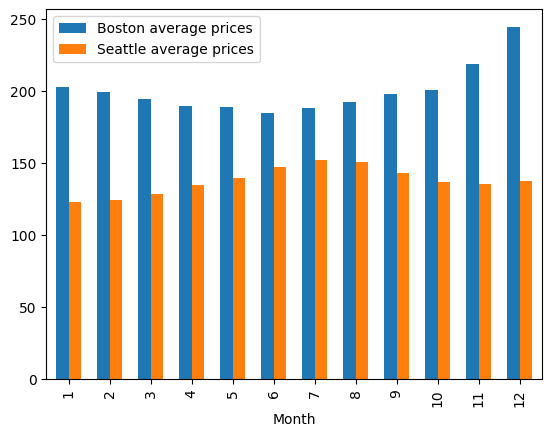

In [5]:
# calculate average prices per month for each city an show the results together

average_price_per_month_seattle = df_seattle_calendar.groupby(['month']).numeric_price.mean()
average_price_per_month_boston = df_boston_calendar.groupby(['month']).numeric_price.mean()
df_mixed = pd.DataFrame({ 
    'Month': average_price_per_month_boston.index, 
    'BostonPrice': average_price_per_month_boston, 
    'SeattlePrice': average_price_per_month_seattle 
}) 

# Plotting the data

prices_plt = df_mixed.plot(x="Month", y=["BostonPrice", "SeattlePrice"], kind="bar", width=0.6) 
prices_plt.legend(["Boston average prices", "Seattle average prices"])
plt.show()

# **Question 2: Which apartments have more reviews?**
**Prepare Data**

After looking into the dataset,I used a filter in terms of number of reviews to show only the accomodations with more numbers of reviews.

**Data Modelling**

In 2 different charts, one for Seattle and one for Boston, the accomodation_ids of the places with more reviews are shown, indicating the number of reviews

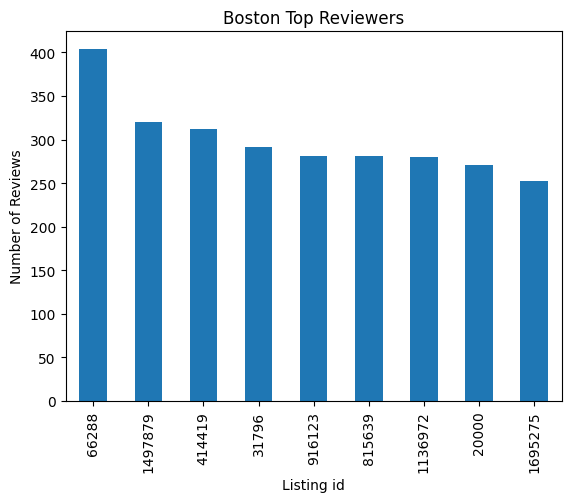

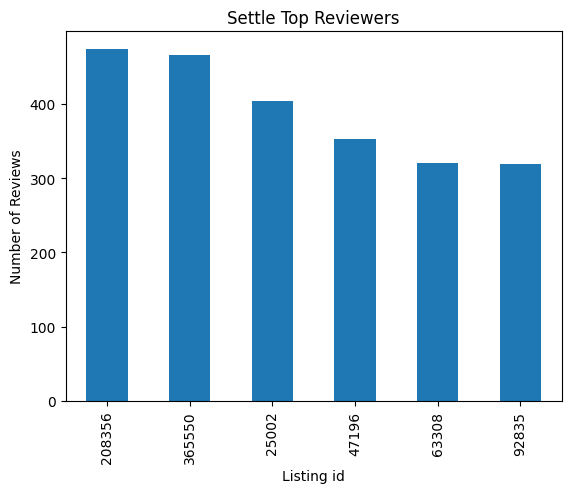

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [6]:
# Get the top reviewers

review_counts_boston = df_boston_reviews['listing_id'].value_counts()
top_reviewers_boston = review_counts_boston[review_counts_boston > 250]

top_reviewers_boston.plot(kind='bar')
plt.xlabel('Listing id')
plt.ylabel('Number of Reviews')
plt.title('Boston Top Reviewers')
plt.show()

review_counts_seattle = df_seattle_reviews['listing_id'].value_counts()
top_reviewers_seattle = review_counts_seattle[review_counts_seattle > 300]

top_reviewers_seattle.plot(kind='bar')
plt.xlabel('Listing id')
plt.ylabel('Number of Reviews')
plt.title('Settle Top Reviewers')
plt.show()

df_boston_reviews.head()

# **Question 3: How availability varies depending on the month and city?**
**Prepare Data**

In order to count the number where accomodations are available, a map needs to be made to translate the values form 't'/'f' to 'True'/'False'

Once translated and grouped the data by month, it is counted the values when an accomodation is available

**Data Modelling**

In a bar chart, it is shown the availability of accomodations per month

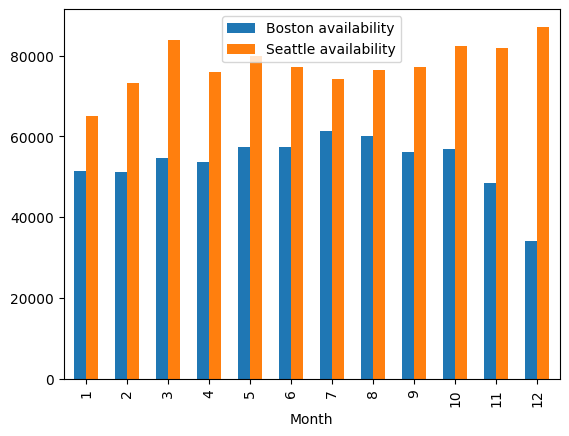

In [7]:
# Get the number of available days per month
df_seattle_calendar['available'] = df_seattle_calendar['available'].map({'t': True, 'f': False})
df_boston_calendar['available'] = df_boston_calendar['available'].map({'t': True, 'f': False})

# Drop rows with NaN values in 'available' column
df_seattle_calendar = df_seattle_calendar.dropna(subset=['available'])
df_boston_calendar = df_boston_calendar.dropna(subset=['available'])

# Group by 'month' and count the number of True values in 'available' column
availability_month_seattle = df_seattle_calendar[df_seattle_calendar['available'] == True].groupby('month').sum()
availability_month_boston = df_boston_calendar[df_boston_calendar['available'] == True].groupby('month').sum()

# Reset index of availability_month_seattle
availability_month_seattle = availability_month_seattle.reset_index()

# Create df_availability_mixed DataFrame
df_availability_mixed = pd.DataFrame({ 
    'Month': availability_month_seattle['month'],
    'BostonAvailability': availability_month_boston['available'].values,
    'SeattleAvailability': availability_month_seattle['available'].values
})

# Set 'Month' as the index
df_availability_mixed.set_index('Month', inplace=True)

# Plotting the data
availability_plt = df_availability_mixed.plot(kind="bar", width=0.6) 
availability_plt.legend(["Boston availability", "Seattle availability"])
plt.show()